In [1]:
  
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

Using TensorFlow backend.


In [2]:
num_classes = 5
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = './fer2013/train/'
validation_data_dir = './fer2013/validation/'


In [3]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [4]:
print(train_generator.class_indices)


{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Surprise': 4}


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()


In [6]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('Emotion_model.h5',
                             monitor='val_ac',
                             mode='max',
                             save_best_only=True,
                             verbose=1)



callbacks = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

nb_train_samples = 24256
nb_validation_samples = 3006
epochs=60

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/60
47/47 [==============================] - 63s 1s/step - loss: 1.6349 - accuracy: 0.2772 - val_loss: 1.6327 - val_accuracy: 0.2969
Epoch 2/60
47/47 [==============================] - 64s 1s/step - loss: 1.6306 - accuracy: 0.2793 - val_loss: 1.6270 - val_accuracy: 0.2674
Epoch 3/60
47/47 [==============================] - 65s 1s/step - loss: 1.6141 - accuracy: 0.2926 - val_loss: 1.5980 - val_accuracy: 0.2907
Epoch 4/60
47/47 [==============================] - 66s 1s/step - loss: 1.6027 - accuracy: 0.2983 - val_loss: 1.6134 - val_accuracy: 0.2831
Epoch 5/60
47/47 [==============================] - 66s 1s/step - loss: 1.5977 - accuracy: 0.3001 - val_loss: 1.5958 - val_accuracy: 0.2987
Epoch 6/60
47/47 [==============================] - 61s 1s/step - loss: 1.5947 - accuracy: 0.2979 - val_loss: 1.6043 - val_accuracy: 0.2911
Epoch 7/60
47/47 [==============================] - 61s 1s/step - loss: 1.5909 - accuracy: 0.2987 - val_loss: 1.5922 - val_accuracy: 0.2879
Epoch 8/60
47/47 [==

KeyboardInterrupt: 

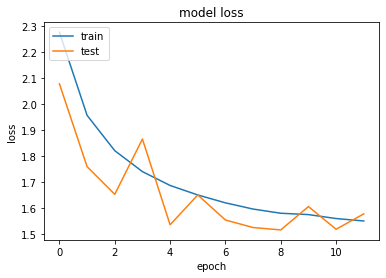

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()